# Handling Imbalanced Dataset (ML)

Approaches:
- Decision tree based modelling
- Oversampling/ Undersampling
- SMOTE

Key considerations:
- Accuracy in a imbalanced setting, don't give a good perspective
- F1 score is a good target!
- When performing a CV/ Splitting is important to stratify!
- When performing upsampling/SMOTE, this has to be applied only on the training! (not even on the validation set of the CV)

Observations:
I used log transformation for reducing the outliers!

In [1]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/simoneboesso/Desktop/LiverDiseaseClassification/indian_liver_patient.csv")

In [3]:
df.shape

(583, 11)

Remarks:
- clearly too less data for training a DL approach!

In [4]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [5]:
print(df.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64


In [6]:
print(df['Albumin_and_Globulin_Ratio'].mean())
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(0.947)

0.9470639032815197


In [7]:
df = df.rename(columns={'Dataset':'Label'})

In [8]:
print(df['Label'].value_counts())

Label
1    416
2    167
Name: count, dtype: int64


In [9]:
df['Label'] = df['Label'].replace(1,0)
df['Label'] = df['Label'].replace(2,1)

In [10]:
print(df['Label'].value_counts())

Label
0    416
1    167
Name: count, dtype: int64


In [11]:
print(df.dtypes)

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Label                           int64
dtype: object


In [12]:
df['Gender']=df['Gender'].map({'Male':0,'Female':1})

In [13]:
df.corr().style.background_gradient(cmap='viridis')

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Label
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216089,-0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003403,0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206159,-0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200003,-0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233959,-0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002374,-0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070023,-0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233904,0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686321,0.161388
Albumin_and_Globulin_Ratio,-0.216089,0.003403,-0.206159,-0.200003,-0.233959,-0.002374,-0.070023,0.233904,0.686321,1.000000,0.162318


In [14]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Label'],
      dtype='object')

I removed one of the 2 features (pair with high correlation)

In [15]:
df.drop(['Direct_Bilirubin', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin'], axis=1, inplace=True)

## Let's visualize the distro of the columns

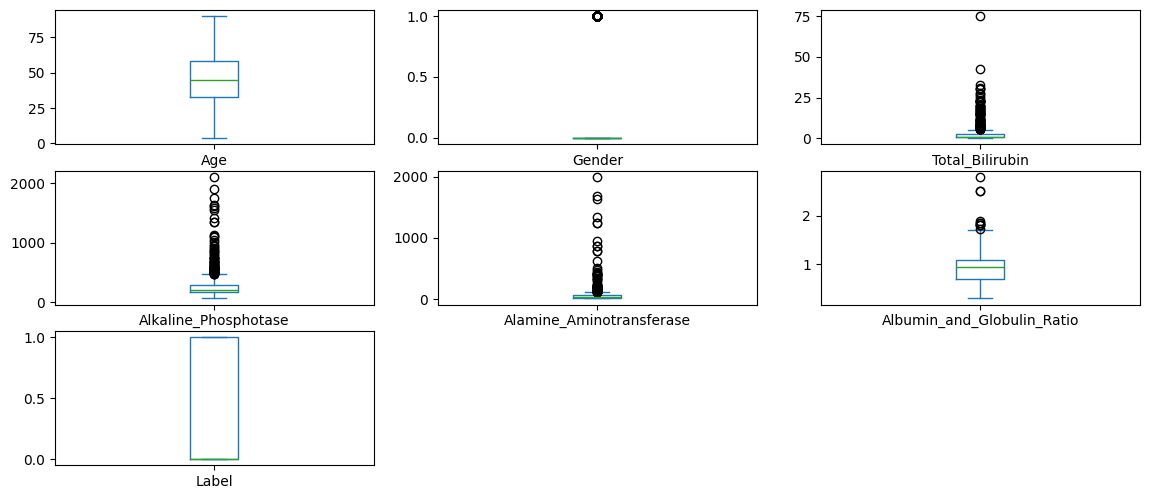

In [16]:
df.plot(kind='box',layout=(4,3),subplots=True,figsize=(14,8))
plt.show()

There are a lot of outliers!

In [17]:
df.describe()

,Age,Gender,Total_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Albumin_and_Globulin_Ratio,Label
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.243568,3.298799,290.576329,80.713551,0.947063,0.286449
std,16.189833,0.429603,6.209522,242.937989,182.620356,0.318492,0.452490
min,4.000000,0.000000,0.400000,63.000000,10.000000,0.300000,0.000000
25%,33.000000,0.000000,0.800000,175.500000,23.000000,0.700000,0.000000
50%,45.000000,0.000000,1.000000,208.000000,35.000000,0.947000,0.000000
75%,58.000000,0.000000,2.600000,298.000000,60.500000,1.100000,1.000000
max,90.000000,1.000000,75.000000,2110.000000,2000.000000,2.800000,1.000000


In [18]:
df = pd.get_dummies(df, columns=['Gender'])

In [19]:
df.shape

(583, 8)

# Saving the dataset!

In [20]:
df.to_csv("StartingPoint.csv")

In [21]:
Y = df["Label"]
X = df.drop("Label", axis=1)

In [22]:
X.columns

Index(['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Albumin_and_Globulin_Ratio', 'Gender_0',
       'Gender_1'],
      dtype='object')

# Training 

In [23]:
COLUMNS = X.columns

In [26]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, stratify = Y,random_state=42)

In [27]:
X_train_or = X_train
y_train_or = y_train

In [28]:
X_train.shape

(437, 7)

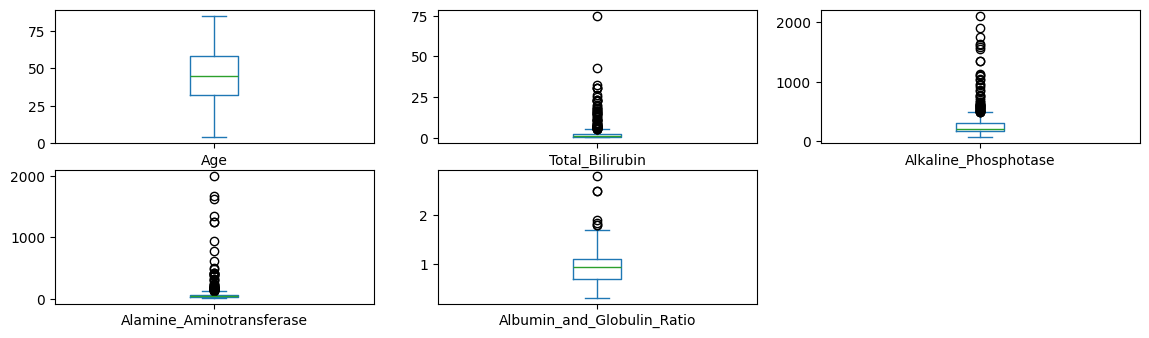

In [29]:
X_train.plot(kind='box',layout=(4,3),subplots=True,figsize=(14,8))
plt.show()

In [30]:
len(COLUMNS)

7

In [31]:
COLUMNS

Index(['Age', 'Total_Bilirubin', 'Alkaline_Phosphotase',
       'Alamine_Aminotransferase', 'Albumin_and_Globulin_Ratio', 'Gender_0',
       'Gender_1'],
      dtype='object')

In [32]:
X_train.shape

(437, 7)

In [33]:
# Apply log1p transformation on dataframe - just selected values
'''This function is particularly useful for data transformation, especially when dealing with data that includes zero values,
 as it efficiently computes the logarithm of 1 plus the input value, 
i.e., log(1+x)'''
Cols_withOutliers = ['Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',"Albumin_and_Globulin_Ratio"]
for c in Cols_withOutliers:
    X_train[c] = np.log1p(X_train[c])

In [34]:
X_train.shape

(437, 7)

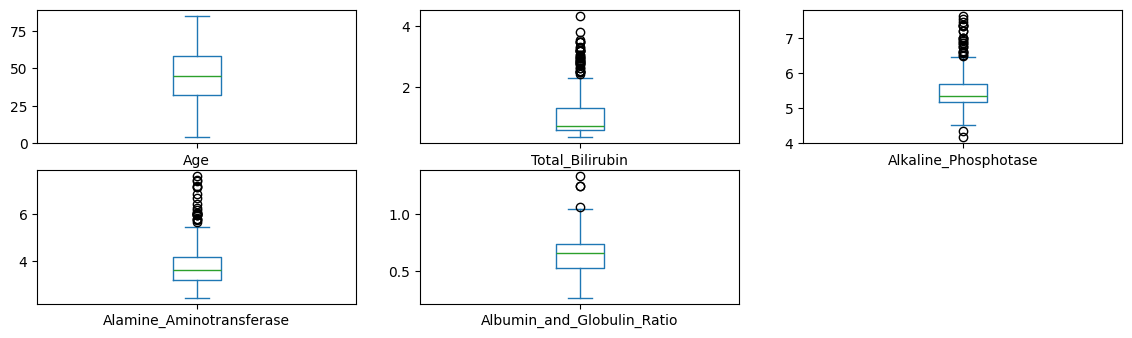

In [35]:
X_train.plot(kind='box',layout=(4,3),subplots=True,figsize=(14,8))
plt.show()

In [36]:
X_train.min()

Age                                  4
Total_Bilirubin               0.336472
Alkaline_Phosphotase          4.158883
Alamine_Aminotransferase      2.397895
Albumin_and_Globulin_Ratio    0.262364
Gender_0                         False
Gender_1                         False
dtype: object

In [37]:
from sklearn.preprocessing import  RobustScaler
rs = RobustScaler()
rs.fit(X_train)
print(X_train.shape)
X_train = rs.transform(X_train)
print(X_train.shape)
Cols_withOutliers = ['Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',"Albumin_and_Globulin_Ratio"]
for c in Cols_withOutliers:
    X_test[c] = np.log1p(X_test[c])
X_test = rs.transform(X_test)

(437, 7)
(437, 7)


In [38]:
X_train.min()

-2.251068003761626

## First approach!

In [39]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(n_estimators = 25, random_state = 42)
model_RF.fit(X_train, y_train)

#importances = list(model_RF.feature_importances_)
features_list = list(COLUMNS)
feature_imp = pd.Series(model_RF.feature_importances_, index=features_list).sort_values(ascending=False)
print(feature_imp)


#Test prediction on testing data. 
prediction_test_RF = model_RF.predict(X_test)

Alkaline_Phosphotase          0.234687
Alamine_Aminotransferase      0.206846
Age                           0.203059
Total_Bilirubin               0.177373
Albumin_and_Globulin_Ratio    0.152754
Gender_1                      0.014227
Gender_0                      0.011054
dtype: float64


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print(classification_report(y_test, prediction_test_RF))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       104
           1       0.37      0.33      0.35        42

    accuracy                           0.64       146
   macro avg       0.55      0.55      0.55       146
weighted avg       0.63      0.64      0.64       146



In [41]:
print(confusion_matrix(y_test, prediction_test_RF))

[[80 24]
 [28 14]]


In [42]:
probs = model_RF.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, probs))

0.6610576923076923


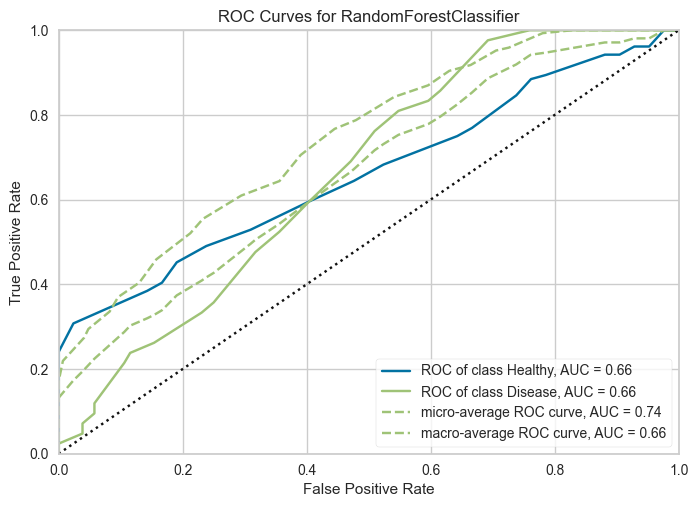

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [43]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

#https://www.scikit-yb.org/en/latest/api/classifier/rocauc.html
from yellowbrick.classifier import ROCAUC

X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = pd.DataFrame(X_test,columns=X.columns)

roc_auc=ROCAUC(model_RF, classes=["Healthy","Disease"])

roc_auc.fit(X_train, y_train)

roc_auc.score(X_test, y_test)
roc_auc.show()

# Second Approach!

In [44]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


### Upsampling!

Let's use Upsampling!

In [45]:
df_2 = pd.read_csv("StartingPoint.csv")
df_2 = df_2.drop("Unnamed: 0", axis=1)

In [46]:
df_2.shape

(583, 8)

In [47]:
df_2["Label"].value_counts()

Label
0    416
1    167
Name: count, dtype: int64

In [48]:
Y = df_2["Label"]
X = df_2.drop("Label", axis=1)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123)

In [50]:
X_train.min()

Age                               4
Total_Bilirubin                 0.4
Alkaline_Phosphotase             75
Alamine_Aminotransferase         10
Albumin_and_Globulin_Ratio      0.3
Gender_0                      False
Gender_1                      False
dtype: object

In [51]:
from sklearn.preprocessing import  RobustScaler

Cols_withOutliers = ['Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',"Albumin_and_Globulin_Ratio"]
for c in Cols_withOutliers:
    X_train[c] = np.log1p(X_train[c])

rs = RobustScaler()
rs.fit(X_train)
X_train = rs.transform(X_train)

Cols_withOutliers = ['Total_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase',"Albumin_and_Globulin_Ratio"]
for c in Cols_withOutliers:
    X_test[c] = np.log1p(X_test[c])
X_test = rs.transform(X_test)

In [52]:
X_train_smote = X_train.copy()
y_train_smote = y_train


In [53]:
COLUMNS = X.columns

In [54]:
df = pd.DataFrame(X_train, columns=COLUMNS)
df["Label"] = y_train

df_majority = df[df['Label'] == 0]
df_minority = df[df['Label'] == 1] 

In [55]:
print(df['Label'].value_counts())

Label
0.0    237
1.0     95
Name: count, dtype: int64


In [58]:
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=237,    # to match majority class
                                 random_state=42) # reproducible results
df_minority_upsampled.shape

(237, 8)

In [59]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
print(df_upsampled['Label'].value_counts())

Label
0.0    237
1.0    237
Name: count, dtype: int64


In [60]:
y_upsampled = df_upsampled["Label"].values
X_train_upsampled = df_upsampled.drop(labels = ["Label"], axis=1) 

In [61]:
from sklearn.ensemble import RandomForestClassifier
model_RF_upsampled = RandomForestClassifier(n_estimators = 25, random_state = 42)

# Train the model on training data
model_RF_upsampled.fit(X_train_upsampled, y_upsampled)
prediction_test_RF_upsampled = model_RF_upsampled.predict(X_test)

In [62]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
print(classification_report(y_test, prediction_test_RF_upsampled))

              precision    recall  f1-score   support

           0       0.72      0.89      0.79       102
           1       0.42      0.18      0.25        44

    accuracy                           0.68       146
   macro avg       0.57      0.54      0.52       146
weighted avg       0.63      0.68      0.63       146



In [63]:
print(confusion_matrix(y_test, prediction_test_RF_upsampled))

[[91 11]
 [36  8]]


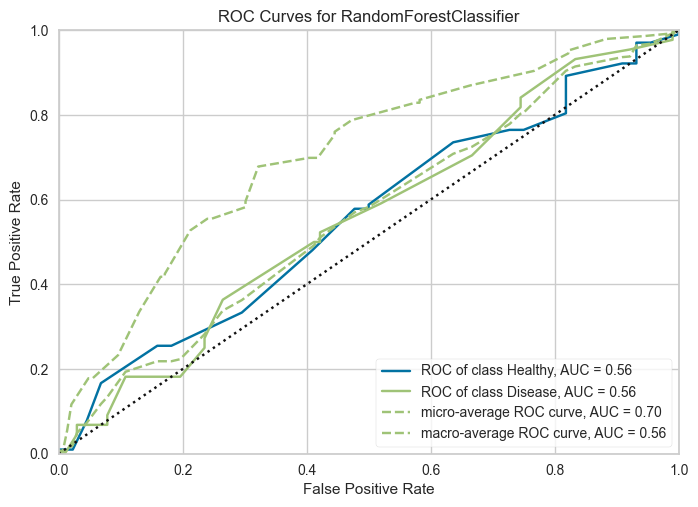

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [64]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

#https://www.scikit-yb.org/en/latest/api/classifier/rocauc.html
from yellowbrick.classifier import ROCAUC

X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = pd.DataFrame(X_test,columns=X.columns)

roc_auc=ROCAUC(model_RF_upsampled, classes=["Healthy","Disease"])

roc_auc.fit(X_train_upsampled, y_upsampled)

roc_auc.score(X_test, y_test)
roc_auc.show()

# Third Approach!

Let's use SMOTE

In [65]:
X_train_smote.shape

(437, 7)

In [66]:
from imblearn.over_sampling import SMOTE, ADASYN

X_smote, Y_smote = SMOTE().fit_resample(X_train_smote, y_train_smote) 

In [67]:
(unique, counts) = np.unique(y_train, return_counts=True)
print("Original data: ", unique, counts)
(unique2, counts2) = np.unique(Y_smote, return_counts=True)
print("After SMOTE: ", unique2, counts2)

Original data:  [0 1] [314 123]
After SMOTE:  [0 1] [314 314]


In [70]:
model_SMOTE = RandomForestClassifier( n_estimators=25,random_state = 42)
model_SMOTE.fit(X_smote, Y_smote)
prediction_test_smote = model_SMOTE.predict(X_test)

In [71]:
print(classification_report(y_test, prediction_test_smote))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78       102
           1       0.51      0.61      0.56        44

    accuracy                           0.71       146
   macro avg       0.66      0.68      0.67       146
weighted avg       0.72      0.71      0.71       146



In [72]:
print(confusion_matrix(y_test, prediction_test_smote))

[[76 26]
 [17 27]]


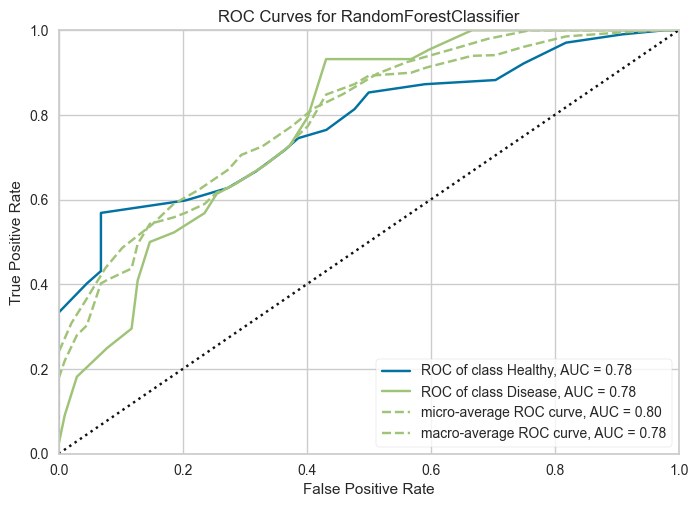

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [73]:
roc_auc=ROCAUC(model_SMOTE, classes=["Healthy","Disease"])
roc_auc.fit(X_smote, Y_smote)
roc_auc.score(X_test, y_test)
roc_auc.show()

# Results!

Seems like the random forest with SMOTE has the best perfomances!